<a href="https://colab.research.google.com/github/Brunokrk/Sigmoidal/blob/main/Aula_001/Aula_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

##Séries Temporais (Time Series) - **Parte 1**

In [ ]:
#importando pacotes e setando configurações de plots
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose #biblioteca utilizada para decompor a Série Temporal
import seaborn as sns #para melhorar visualixação dos gráficos

sns.set_style()
%matplotlib inline


In [ ]:
#DataSet - link
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

# importar o csv para um dataframe
df = pd.read_csv(dataset_path)

# ver as ENTRADAS
df.head(13) #parametro define a quantidade de entradas



,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
5,06-01-1985,58.0904
6,07-01-1985,62.6202
7,08-01-1985,63.2485
8,09-01-1985,60.5846
9,10-01-1985,56.3154


As datas ainda estão no formato de **STRING**

In [ ]:
#Convertendo para  tipo datetime
print("[ANTES]")
display(df.DATE.head())

[ANTES]


0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [ ]:
#Convertendo para  tipo datetime
print("[DEPOIS]")
display(pd.to_datetime(df.DATE, format="%m-%d-%Y").head()) #"Y" para anos com 4 digitos, "y" para anos com 2 digitos

[DEPOIS]


0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [2]:
#Boa prática, associar a data ao índice [0,1,2,3...]
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

#eliminar coluna DATE
df.drop('DATE', inplace = True, axis = 1)

df.head()


NameError: ignored

#2.Visualizar **Séries Temporais**

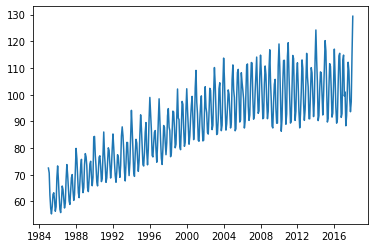

In [ ]:
#plotar gráfico de consumo de eletricidade
plt.plot(df.index, df.Value)

#Decompor **Séries Temporais** em seus componentes

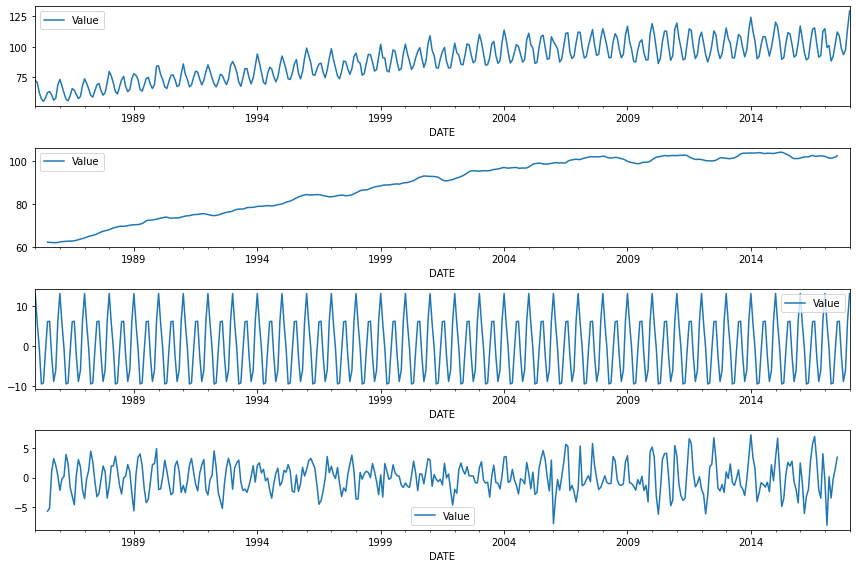

In [ ]:
#salvar a decomposição em result
result = seasonal_decompose(df)

#plotar decomposição
#result.plot();

#-------------------------
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1) #série temporal
result.trend.plot(ax=ax2) #tendencia
result.seasonal.plot(ax=ax3) #sazonalidade
result.resid.plot(ax=ax4) #residual
plt.tight_layout()


#Análise Exploratória e Extração de Features

In [ ]:
ferroviaria_dataset = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"

#importando os dados do dataset
df_trem = pd.read_csv(ferroviaria_dataset)

#ver 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


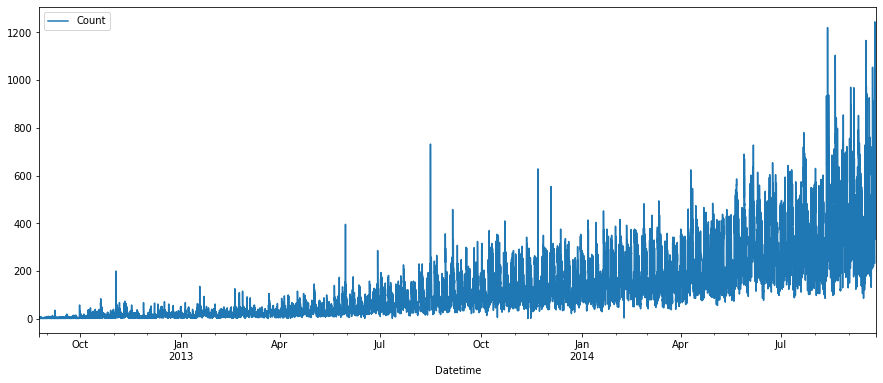

In [ ]:
#converter a coluna Datetime em tipo datetime

df_trem['Datetime'] = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M") # df_trem['Datetime'] == df_trem.Datetime

#plotar grafico
fig, ax = plt.subplots(figsize = (15,6))
df_trem.plot(x='Datetime', y='Count', ax=ax);

###**Observações**
Perceptível uma tendência de alta, porém está tudo muito poluído, bagunçado

###**Hipóteses**

*   Pessoas viajam mais durante a semana
*   Existem horários de pico por causa das idas e vindas dos trabalhos
*   Existem períodos do ano onde a demanda por transporte é maior




In [ ]:
#criar features para cada período
df_trem['year'] = df_trem.Datetime.dt.year
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day'] = df_trem.Datetime.dt.day
df_trem['hour'] = df_trem.Datetime.dt.hour
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

df_trem.head()

,ID,Datetime,Count,year,month,day,hour,dayofweek,day_o_fweek,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,5,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,5,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,5,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,5,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,5,5


In [ ]:
#converter as variáveis em 0 e 1
df_trem['weekend'] = 0 #todo mundo é 0
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), 'weekend'] = 1 #quem for sábado ou domingo = 1

df_trem

,ID,Datetime,Count,year,month,day,hour,dayofweek,day_o_fweek,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,5,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,5,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,5,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,5,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,3,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,3,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,3,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,3,3,0


In [ ]:
#verificando valores final de semana x dia semana
df_trem.weekend.value_counts()


0    13056
1     5232
Name: weekend, dtype: int64

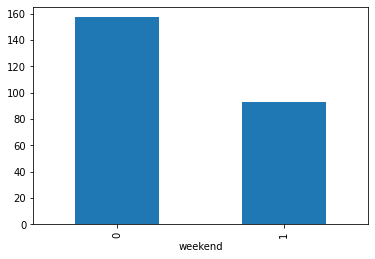

In [ ]:
#plotando os valores final de semana x dia semana
df_trem.groupby('weekend').Count.mean().plot.bar();

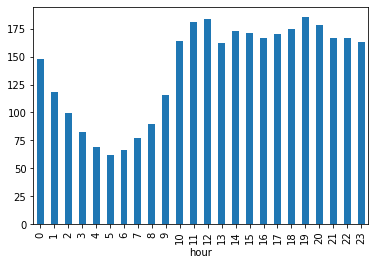

In [ ]:
#ver count por horários
df_trem.groupby('hour').Count.mean().plot.bar();

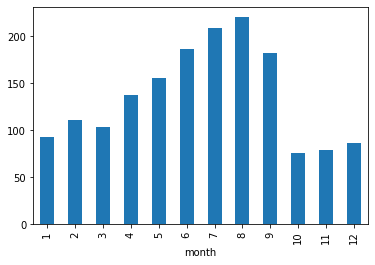

In [ ]:
#ver count por mes
df_trem.groupby('month').Count.mean().plot.bar();